In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import Kmeans
from sklearn.cluster import KMeans
from sklearn import metrics


iris = sns.load_dataset("iris")

print(iris)

iris = iris.drop(["species"], axis = 1)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


In [2]:
def normalization(src, maxs = np.nan, mins = np.nan) :
    
    if(maxs is np.nan) : maxs = src.max()
    
    if(mins is np.nan) : mins = src.min()
    
    dst = (src - mins) / (maxs - mins)
    
    return dst

In [3]:
iris['sepal_size'] = iris['sepal_length'] * iris['sepal_width']

iris['petal_size'] = iris['petal_length'] * iris['petal_width']

iris = normalization(iris)

data = np.array([[x, y] for x, y in zip(iris['sepal_size'], iris['petal_size'])])


In [4]:
result_SSE = []

for i in range(2, 20) :
    biKMS = Kmeans.Kmeans(i, 2)
    
    biKMS.fit(data, maxIter = 100, distance = Kmeans.Kmeans.Distance.Euclidean)
    
    temp = np.array(Kmeans.Kmeans.SSE(biKMS.collective, data, Kmeans.biKmeans.classify(biKMS.collective, data))).sum()
    
    result_SSE.append(temp)


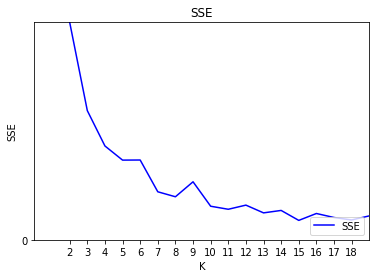

In [5]:
plt.xticks(np.arange(2, len(result_SSE) + 1, 1))

plt.xlim((0, len(result_SSE) + 1))

plt.yticks(np.arange(0, int(np.max(result_SSE)), 10))

plt.ylim((0, np.max(result_SSE)))

plt.plot(range(2, len(result_SSE) + 2), result_SSE, color = '#0000ff', label = 'SSE')

plt.title('SSE')

plt.ylabel('SSE')

plt.xlabel('K')

plt.legend(loc='lower right')

plt.show()

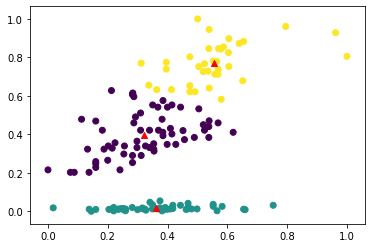

In [6]:
biKMS = Kmeans.biKmeans(3, 2)

biKMS.fit(data, maxIter = 100, distance = Kmeans.Kmeans.Distance.Euclidean, debug = 0)

plt.scatter(data[:, 0], data[:, 1], c = biKMS.classify(biKMS.collective, data))

plt.scatter(biKMS.collective[:, 0], biKMS.collective[:, 1], marker = '^', c = '#ff0000')

plt.show()
